In [26]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        stroopdata = unicodecsv.DictReader(f)
        return list(stroopdata)

In [29]:
var = read_csv('stroopdata.csv')
print var

[{u'Congruent': u'12.079', u'Incongruent': u'19.278'}, {u'Congruent': u'16.791', u'Incongruent': u'18.741'}, {u'Congruent': u'9.564', u'Incongruent': u'21.214'}, {u'Congruent': u'8.630', u'Incongruent': u'15.687'}, {u'Congruent': u'14.669', u'Incongruent': u'22.803'}, {u'Congruent': u'12.238', u'Incongruent': u'20.878'}, {u'Congruent': u'14.692', u'Incongruent': u'24.572'}, {u'Congruent': u'8.987', u'Incongruent': u'17.394'}, {u'Congruent': u'9.401', u'Incongruent': u'20.762'}, {u'Congruent': u'14.480', u'Incongruent': u'26.282'}, {u'Congruent': u'22.328', u'Incongruent': u'24.524'}, {u'Congruent': u'15.298', u'Incongruent': u'18.644'}, {u'Congruent': u'15.073', u'Incongruent': u'17.510'}, {u'Congruent': u'16.929', u'Incongruent': u'20.330'}, {u'Congruent': u'18.200', u'Incongruent': u'35.255'}, {u'Congruent': u'12.130', u'Incongruent': u'22.158'}, {u'Congruent': u'18.495', u'Incongruent': u'25.139'}, {u'Congruent': u'10.639', u'Incongruent': u'20.429'}, {u'Congruent': u'11.344', u'Inc

In [127]:
import csv

congruent_list = []
incongruent_list = []
def read_csv_simple(filename):
    with open(filename, 'rb') as f:
        stroop = csv.reader(f)
        for row in stroop:
            congruent_list.append(row[0])
            incongruent_list.append(row[1])

    print congruent_list 
    print incongruent_list

In [133]:
def integers(named_list):
    integer_list = []
    for i in range(1,len(named_list)):
        integer_list.append(float(named_list[i]))
    return integer_list

congruent = integers(congruent_list)
incongruent = integers(incongruent_list)

print congruent
print incongruent

print congruent[0]





[12.079, 16.791, 9.564, 8.63, 14.669, 12.238, 14.692, 8.987, 9.401, 14.48, 22.328, 15.298, 15.073, 16.929, 18.2, 12.13, 18.495, 10.639, 11.344, 12.369, 12.944, 14.233, 19.71, 16.004]
[19.278, 18.741, 21.214, 15.687, 22.803, 20.878, 24.572, 17.394, 20.762, 26.282, 24.524, 18.644, 17.51, 20.33, 35.255, 22.158, 25.139, 20.429, 17.425, 34.288, 23.894, 17.96, 22.058, 21.157]
12.079


In [140]:
def get_average(named_list):
    sum = 0
    for i in range(len(named_list)):
        sum += named_list[i]
    average = sum / len(named_list)
    return average    

In [142]:
sums_con = get_average(congruent)
sums_incon = get_average(incongruent)

print sums_con
print sums_incon

14.051125
22.0159166667


In [177]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def describe_data(data):
    print 'Mean:', round(np.mean(data),2)
    print 'Standard deviation:', round(np.std(data,ddof=1),2)
    print 'Median:', round(np.nanmedian(data),2)

Populating the interactive namespace from numpy and matplotlib



In [178]:
print describe_data(congruent)

Mean: 14.05
Standard deviation: 3.56
Median: 14.36
None


In [179]:
print describe_data(incongruent)

Mean: 22.02
Standard deviation: 4.8
Median: 21.02
None


In [156]:
def get_difference(data1, data2):
    diff = []
    for i in range(len(data2)):
        difference = data2[i] - data1[i]
        diff.append(difference) 
    return diff

In [157]:
diff_list = get_difference(congruent, incongruent)
print diff_list

[7.198999999999998, 1.9499999999999993, 11.649999999999999, 7.056999999999999, 8.134, 8.64, 9.879999999999999, 8.406999999999998, 11.361, 11.802, 2.1960000000000015, 3.3459999999999983, 2.437000000000001, 3.401, 17.055000000000003, 10.028, 6.643999999999998, 9.79, 6.081000000000001, 21.918999999999997, 10.949999999999998, 3.7270000000000003, 2.347999999999999, 5.152999999999999]


In [180]:
print describe_data(diff_list)

Mean: 7.96
Standard deviation: 4.86
Median: 7.67
None


(array([ 8.,  9.,  5.,  1.,  1.]),
 array([  1.95  ,   5.9438,   9.9376,  13.9314,  17.9252,  21.919 ]),
 <a list of 5 Patch objects>)

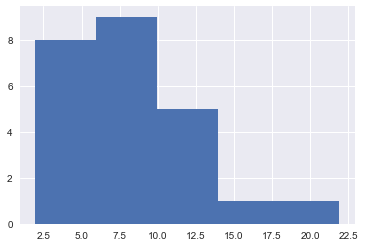

In [188]:
rwidth = 5
plt.hist(diff_list, rwidth)


In [196]:
def describe_more_data(data):
    print "Standard error:", round((np.std(data,ddof=1)) / (len(data)**0.5),2)


In [197]:
describe_more_data(diff_list)

Standard error: 0.99


In [235]:
def t_test(data): 
    t = mean / se
    print "T-test value:", round(t,2)
    

In [236]:
data = diff_list
mean = np.mean(data)
se = (np.std(data,ddof=1)) / (len(data)**0.5)
t_test(data)

T-test value: 8.02


In [242]:
print "T-critical value:", round(stats.t.ppf(1-0.05, 23),3)

T-critical value: 1.714


In [244]:
round(stats.t.ppf(1-0.025, 23),3)

2.069

In [257]:
def confidence_interval(data,tail,num,df):
    mean = np.mean(data)
    se = (np.std(data,ddof=1)) / (len(data)**0.5)
    margin_of_error = round(stats.t.ppf(1-(tail/2), df),3) * se
    confidence_interval = (mean - margin_of_error,
                       mean + margin_of_error) 
    print "CI: ", confidence_interval



In [258]:
confidence_interval(diff_list, 0.05,2, 23)

CI:  (5.91021542131028, 10.019367912023052)


In [278]:
data_to_plot = [congruent, incongruent, diff_list]

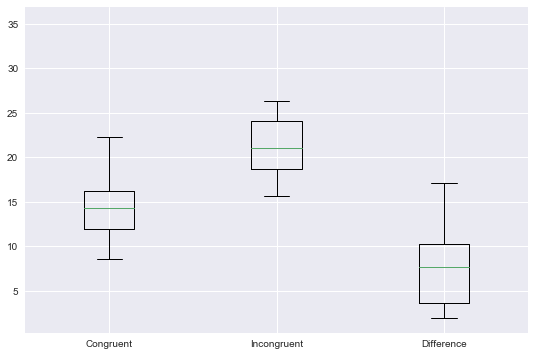

In [281]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

## Custom x-axis labels
ax.set_xticklabels(['Congruent', 'Incongruent','Difference'])

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')